In [156]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import date
import matplotlib.pyplot as plt
from matplotlib import cm as cm
from IPython.display import display # Allows the use of display() for DataFrames
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

# Pretty display for notebooks
%matplotlib inline

#  Import and read the customer_data.csv.
application_df = pd.read_csv("customer_data.csv")
application_df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,9/4/12,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,3/8/14,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,8/21/13,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2/10/14,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,1/19/14,94,173,...,5,0,0,0,0,0,0,3,11,0


## Visual Python Upgrade
NOTE: 
- Refresh your web browser to start a new version.
- Save VP Note before refreshing the page.

In [157]:
!pip install visualpython --upgrade

In [158]:
!visualpy install

Package install command: pip
Already exists Visual Python.
Disabling notebook extension visualpython/visualpython...
      - Validating: OK
Remove Visual Python Directories.
Target Dir :  /Users/saukno/opt/anaconda3/share/jupyter/nbextensions
Copy visualpyhthon extension files ...
--------------------------------------------------------------------------------------------
Source Dir :  /Users/saukno/opt/anaconda3/lib/python3.9/site-packages/visualpython
Target Dir :  /Users/saukno/opt/anaconda3/share/jupyter/nbextensions/visualpython
Enabling notebook extension visualpython/visualpython...
      - Validating: OK


In [159]:
# Import supplementary visualizations code visuals.py
import visualpython as vs

In [160]:
len(application_df)

2240

/Users/saukno/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/saukno/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/var/folders/n5/p8bmh00j693gjlvm2jrhs8qw0000gn/T/ipykernel_1144/1390854322.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


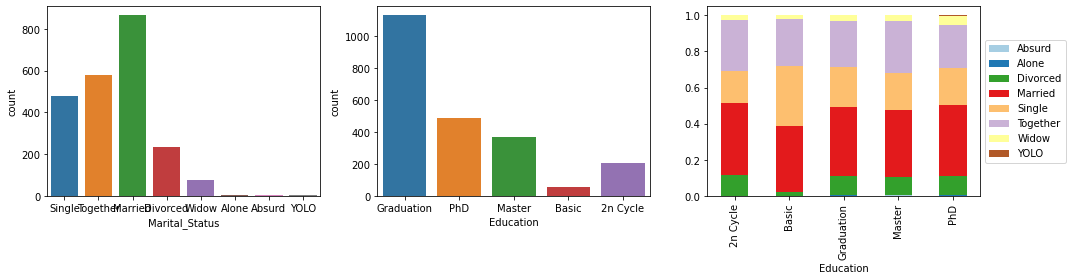

In [161]:
# Taking a look at the categorical variables
fig, ax = plt.subplots(1,3, figsize=(15,4))
sns.countplot(application_df['Marital_Status'], ax=ax[0])
sns.countplot(application_df['Education'], ax=ax[1])
df_plot = application_df.groupby(['Marital_Status', 'Education']).size().reset_index().pivot(columns='Marital_Status', index='Education', values=0)
df_plot.apply(lambda x: x/x.sum(), axis=1).plot(kind='bar', stacked=True, ax=ax[2],  colormap='Paired')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.tight_layout()
fig.show()

In [162]:
# Drop Irrelevant Columns
Clean_app_df = application_df.drop(columns=['ID', 'Dt_Customer', 'Complain'])


In [163]:
# Replace values of campaign to number of campaign that impacted customer

In [164]:
Clean_app_df["AcceptedCmp3"].replace({"1":"3"}, inplace=True)

In [165]:
Clean_app_df["AcceptedCmp2"].replace({"1":"2"}, inplace=True)

In [166]:
Clean_app_df["AcceptedCmp4"].replace({"1":"4"}, inplace=True)

In [167]:
Clean_app_df["AcceptedCmp5"].replace({"1":"5"}, inplace=True)

In [168]:
Clean_app_df["Response"].replace({"1":"6"}, inplace=True)

In [169]:
# Make a new column that indicates the campaign number that impacted the scholar
Clean_app_df['AcceptedCmpOverall'] = Clean_app_df['AcceptedCmp3']+Clean_app_df['AcceptedCmp2']+Clean_app_df['AcceptedCmp4']+Clean_app_df['AcceptedCmp5']+Clean_app_df['Response']

In [170]:
#Drop other campaign columns
Clean_app_df = Clean_app_df.drop(columns=["AcceptedCmp3", "AcceptedCmp2", "AcceptedCmp4", "AcceptedCmp1", "AcceptedCmp5", "Response"])
Clean_app_df.head(5)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,AcceptedCmpOverall
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,88,88,3,8,10,4,7,3,11,1
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,1,6,2,1,1,2,5,3,11,0
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,21,42,1,8,2,10,4,3,11,0
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,3,5,2,2,0,4,6,3,11,0
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,27,15,5,5,3,6,5,3,11,0


In [171]:
# Replace Educational to an ordinal number
dummy_edu_var_aux = pd.get_dummies(Clean_app_df['Education'], prefix='education')
Clean_app_df = pd.concat([Clean_app_df, dummy_edu_var_aux], axis=1)

In [172]:
# Convert birth year to age
Clean_app_df['Age'] = date.today().year - Clean_app_df['Year_Birth']


In [173]:
# Marital -> multiples using Dummy Variables
Clean_app_df.loc[Clean_app_df['Marital_Status'].isin(['Alone','Absurd','YOLO']), 'Marital_Status']  = 'Single'
dummy_mari_var_aux = pd.get_dummies(Clean_app_df['Marital_Status'], prefix='marital')
Clean_app_df = pd.concat([Clean_app_df,dummy_mari_var_aux],axis=1)


In [174]:
# Drop unused columns
Clean_app_df.drop(columns=['Marital_Status','Education','Year_Birth'], inplace=True)


In [175]:
Clean_app_df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_Basic,education_Graduation,education_Master,education_PhD,Age,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,1,0,0,65,0,0,1,0,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,1,0,0,68,0,0,1,0,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,1,0,0,57,0,0,0,1,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,1,0,0,38,0,0,0,1,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,1,41,0,1,0,0,0


In [176]:
display(Clean_app_df.describe())

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_Basic,education_Graduation,education_Master,education_PhD,Age,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow
count,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,...,0.024107,0.503125,0.165179,0.216964,53.194196,0.103571,0.385714,0.217411,0.258929,0.034375
std,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,...,0.153416,0.500102,0.371425,0.412270,11.984069,0.304772,0.486872,0.412576,0.438144,0.182231
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,...,0.000000,1.000000,0.000000,0.000000,52.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,...,0.000000,1.000000,0.000000,0.000000,63.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,...,1.000000,1.000000,1.000000,1.000000,129.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [177]:
list(Clean_app_df.columns)

['Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Z_CostContact',
 'Z_Revenue',
 'AcceptedCmpOverall',
 'education_2n Cycle',
 'education_Basic',
 'education_Graduation',
 'education_Master',
 'education_PhD',
 'Age',
 'marital_Divorced',
 'marital_Married',
 'marital_Single',
 'marital_Together',
 'marital_Widow']

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Kidhome'}>],
       [<AxesSubplot:title={'center':'Teenhome'}>,
        <AxesSubplot:title={'center':'MntWines'}>,
        <AxesSubplot:title={'center':'MntFruits'}>],
       [<AxesSubplot:title={'center':'MntMeatProducts'}>,
        <AxesSubplot:title={'center':'MntFishProducts'}>,
        <AxesSubplot:title={'center':'MntSweetProducts'}>],
       [<AxesSubplot:title={'center':'MntGoldProds'}>,
        <AxesSubplot:title={'center':'AcceptedCmpOverall'}>,
        <AxesSubplot:>]], dtype=object)

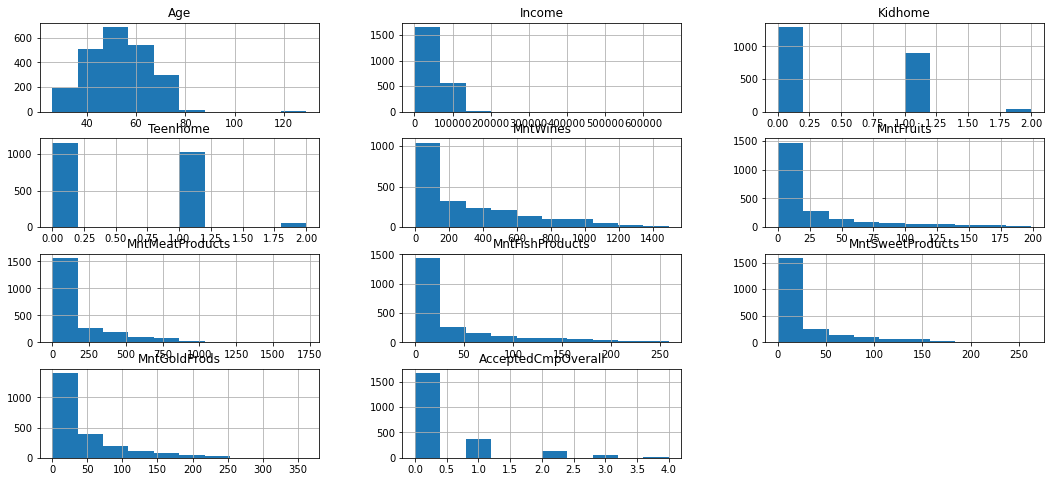

In [178]:
Clean_app_df.hist( column = ['Age', 'Income', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'AcceptedCmpOverall'], figsize=(18,8))



<AxesSubplot:>

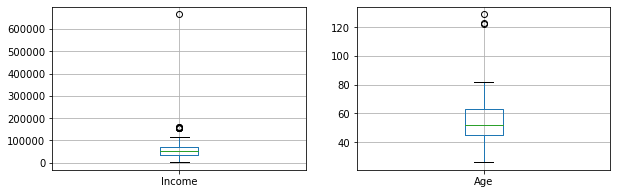

In [179]:
fig, ax = plt.subplots(1,2, figsize=(10,3))

Clean_app_df.boxplot(column=['Income'], ax=ax[0])
Clean_app_df.boxplot(column=['Age'], ax=ax[1])

In [180]:
len(Clean_app_df) - len(Clean_app_df.dropna())

24

In [181]:
Q1 = Clean_app_df.Income.quantile(0.25)
Q3 = Clean_app_df.Income.quantile(0.75)
IQR = Q3 - Q1

Income_outliers = Clean_app_df[Clean_app_df.Income > Q3 + 1.5*IQR]
Clean_app_df = Clean_app_df[Clean_app_df.Income < Q3 + 1.5*IQR]
Income_outliers.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_Basic,education_Graduation,education_Master,education_PhD,Age,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow
164,157243.0,0,1,98,20,2,1582,1,2,1,...,0,0,0,1,49,0,1,0,0,0
617,162397.0,1,1,31,85,1,16,2,1,2,...,0,0,0,1,46,0,0,0,1,0
655,153924.0,0,0,81,1,1,1,1,1,1,...,0,1,0,0,47,1,0,0,0,0
687,160803.0,0,0,21,55,16,1622,17,3,4,...,0,0,0,1,40,0,1,0,0,0
1300,157733.0,1,0,37,39,1,9,2,0,8,...,0,0,1,0,51,0,0,0,1,0


In [182]:
Q1 = Clean_app_df.Age.quantile(0.25)
Q3 = Clean_app_df.Age.quantile(0.75)
IQR = Q3 - Q1

Age_outliers = Clean_app_df[Clean_app_df.Age > Q3 + 1.5*IQR]
Clean_app_df = Clean_app_df[Clean_app_df.Age < Q3 + 1.5*IQR]
Age_outliers.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_Basic,education_Graduation,education_Master,education_PhD,Age,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow
192,36640.0,1,0,99,15,6,8,7,4,25,...,0,0,0,0,122,1,0,0,0,0
239,60182.0,0,1,23,8,0,5,7,0,2,...,0,0,0,0,129,0,0,1,0,0
339,83532.0,0,0,36,755,144,562,104,64,224,...,0,0,0,1,123,0,0,0,1,0


In [183]:
# Features Correlation Analysis
Clean_app_df = Clean_app_df.drop(['Z_CostContact', 'Z_Revenue'], axis=1).corr(method='spearman')
corr_mask = Clean_app_df.mask(np.triu(np.ones_like(Clean_app_df, dtype=np.bool)))
corr_unstacked = corr_mask.unstack().sort_values(ascending = False)

/var/folders/n5/p8bmh00j693gjlvm2jrhs8qw0000gn/T/ipykernel_1144/4123269493.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corr_mask = Clean_app_df.mask(np.triu(np.ones_like(Clean_app_df, dtype=np.bool)))


/var/folders/n5/p8bmh00j693gjlvm2jrhs8qw0000gn/T/ipykernel_1144/470415875.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(Clean_app_df, dtype=np.bool))


<AxesSubplot:>

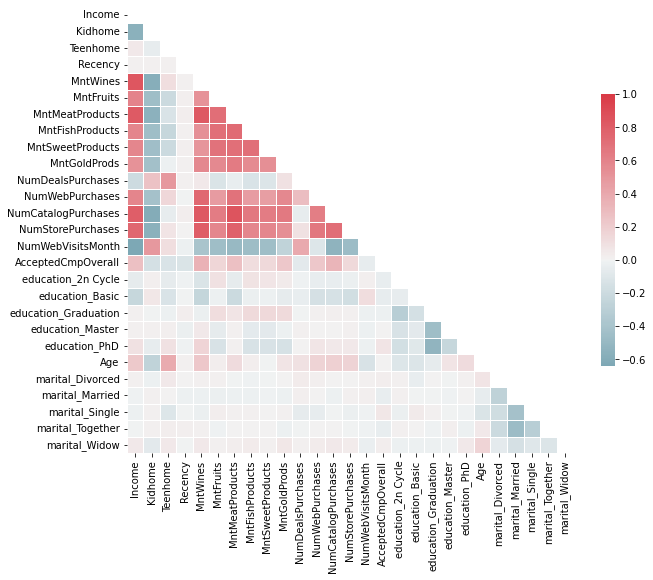

In [184]:
# Draw the heatmap with the mask and correct aspect ratio
mask = np.triu(np.ones_like(Clean_app_df, dtype=np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.subplots(figsize=(10,10))
sns.heatmap(Clean_app_df, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [185]:
pd.DataFrame(corr_unstacked[(abs(corr_unstacked)>0.8)&(abs(corr_unstacked)<1)]).sort_index().style.background_gradient(cmap='coolwarm', low=.5, high=-.7)


In [186]:
pd.DataFrame(corr_unstacked[corr_unstacked<-.5]).sort_index().style.background_gradient(cmap='coolwarm', low=-.6, high=.5)

In [187]:
# Correlation Results
# Income is a factor for several other features, such as amount spent, positively correlates with meat and wine but has a negative correlation with the number of kids and visits on the website. 
# The number of children in the home has a negative correlation to income, amount spent and wine purchases. Higher income is also related to accepted campaigns. 

In [188]:
# Segmentation of Customers

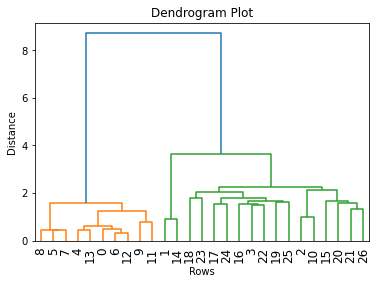

In [189]:
input_matrix = linkage(Clean_app_df, 'ward')

plt.title('Dendrogram Plot')
plt.xlabel('Rows')
plt.ylabel('Distance')

dendrogram(
    input_matrix,
    truncate_mode='lastp',show_leaf_counts=False,
    leaf_rotation=90., leaf_font_size=12., show_contracted=True,)

plt.show()

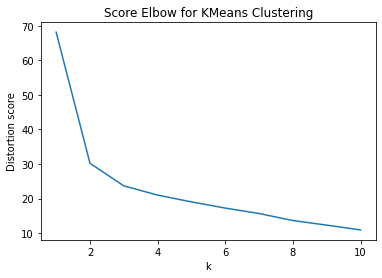

In [190]:
km_eval = []

for i in range(1,11):
    kmeans_model=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans_model.fit(Clean_app_df)
    km_eval.append(kmeans_model.inertia_)

# Plot Kmeans for k from 1 to 10 criterion
plt.plot(range(1,11), km_eval)
plt.title('Score Elbow for KMeans Clustering')
plt.xlabel('k')
plt.ylabel('Distortion score')
plt.show()

array([[<AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Kidhome'}>,
        <AxesSubplot:title={'center':'Teenhome'}>,
        <AxesSubplot:title={'center':'Recency'}>,
        <AxesSubplot:title={'center':'MntWines'}>],
       [<AxesSubplot:title={'center':'MntFruits'}>,
        <AxesSubplot:title={'center':'MntMeatProducts'}>,
        <AxesSubplot:title={'center':'MntFishProducts'}>,
        <AxesSubplot:title={'center':'MntSweetProducts'}>,
        <AxesSubplot:title={'center':'MntGoldProds'}>],
       [<AxesSubplot:title={'center':'NumDealsPurchases'}>,
        <AxesSubplot:title={'center':'NumWebPurchases'}>,
        <AxesSubplot:title={'center':'NumCatalogPurchases'}>,
        <AxesSubplot:title={'center':'NumStorePurchases'}>,
        <AxesSubplot:title={'center':'NumWebVisitsMonth'}>],
       [<AxesSubplot:title={'center':'AcceptedCmpOverall'}>,
        <AxesSubplot:title={'center':'education_2n Cycle'}>,
        <AxesSubplot:title={'center':'educ

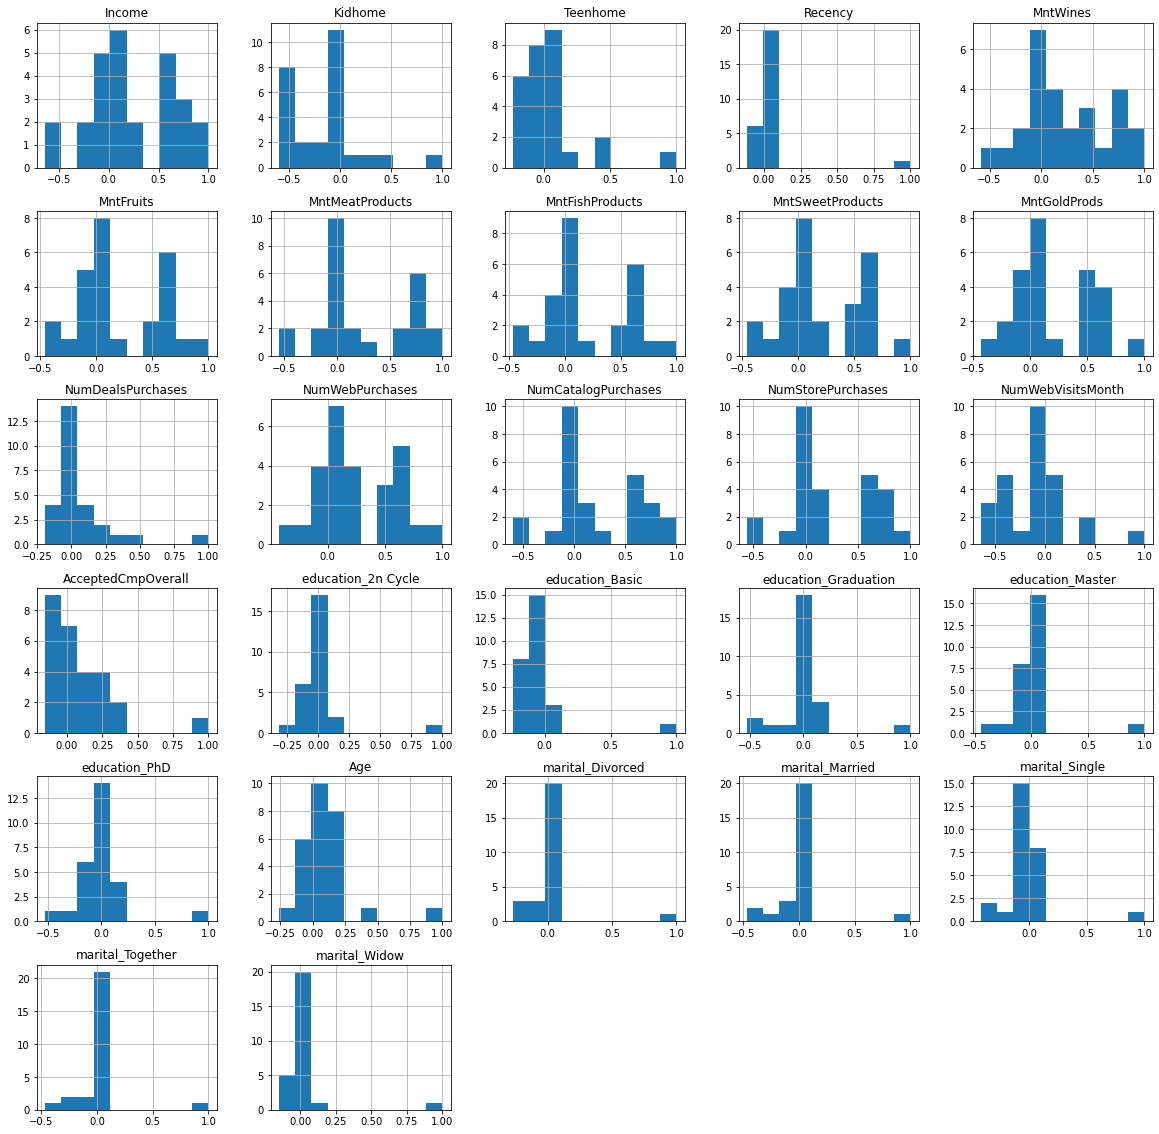

In [198]:
Clean_app_df.hist(figsize=(20,20))

In [147]:
Meat_Customers = Clean_app_df.drop(columns=['MntWines','MntFruits', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'])


In [147]:
Meat_Customers = Clean_app_df.drop(columns=['MntWines','MntFruits', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'])


In [150]:
# Create Tables based on Purchase Type to segregate the type of customer that purchases specific items for targeting purposes
Meat_Customers = Clean_app_df.drop(columns=['MntWines','MntFruits', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'])

# Remove all rows of customers that have not purchased this product
Meat_Customers = Meat_Customers[Meat_Customers['MntMeatProducts'] != 0]

# Check that removal has occured
Meat_cust = len(Meat_Customers)
Meat_cust

2239

In [151]:
display(Meat_Customers.describe())

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntMeatProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp
count,2239.000000,2215.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000
mean,1968.803037,52265.670880,0.444395,0.506476,49.124163,167.024565,2.325592,4.086199,2.663243,5.791871,5.316213,0.382760
std,11.986031,25163.819732,0.538436,0.544555,28.960463,225.738199,1.932466,2.778569,2.923212,3.250697,2.427144,0.758913
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35331.000000,0.000000,0.000000,24.000000,16.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000
50%,1970.000000,51390.000000,0.000000,0.000000,49.000000,67.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000
75%,1977.000000,68557.000000,1.000000,1.000000,74.000000,232.000000,3.000000,6.000000,4.000000,8.000000,7.000000,1.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1725.000000,15.000000,27.000000,28.000000,13.000000,20.000000,4.000000


In [152]:
# Create Tables based on Purchase Type to segregate the type of customer that purchases specific items for targeting purposes
Wine_Customers = Clean_app_df.drop(columns=['MntMeatProducts','MntFruits', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'])

# Remove all rows of customers that have not purchased this product
Wine_Customers = Wine_Customers[Wine_Customers['MntWines'] != 0]

# Check that removal has occured
Wine_cust = len(Wine_Customers)
Wine_cust

2227

In [153]:
display(Wine_Customers.describe())

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp
count,2227.000000,2203.000000,2227.000000,2227.000000,2227.000000,2227.000000,2227.000000,2227.000000,2227.000000,2227.000000,2227.000000,2227.000000
mean,1968.757970,52448.357694,0.444544,0.509205,49.060620,305.709924,2.331388,4.102380,2.677593,5.809160,5.308936,0.384374
std,11.966833,25105.962378,0.538667,0.544746,28.957189,336.774160,1.935788,2.777028,2.924515,3.250675,2.429366,0.760366
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35686.000000,0.000000,0.000000,24.000000,24.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000
50%,1970.000000,51537.000000,0.000000,0.000000,49.000000,178.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000
75%,1977.000000,68656.000000,1.000000,1.000000,74.000000,505.000000,3.000000,6.000000,4.000000,8.000000,7.000000,1.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,15.000000,27.000000,28.000000,13.000000,20.000000,4.000000


In [154]:
# Create Tables based on Purchase Type to segregate the type of customer that purchases specific items for targeting purposes
Fruits_Customers = Clean_app_df.drop(columns=['MntMeatProducts','MntWines', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'])

# Remove all rows of customers that have not purchased this product
Fruits_Customers = Fruits_Customers[Fruits_Customers['MntFruits'] != 0]

# Check that removal has occured
Fruits_cust = len(Fruits_Customers)
Fruits_cust

1840

In [155]:
display(Fruits_Customers.describe())

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntFruits,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp
count,1840.000000,1821.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.00000,1840.000000,1840.000000
mean,1969.038587,53882.682592,0.404348,0.463043,49.626630,32.020109,2.304348,4.272283,2.908152,6.05163,5.128804,0.395652
std,12.053584,26418.034124,0.522035,0.542629,29.131161,41.747137,1.907822,2.749916,2.954198,3.26716,2.472741,0.774795
min,1899.000000,1730.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1959.000000,35797.000000,0.000000,0.000000,24.000000,4.000000,1.000000,2.000000,1.000000,3.00000,3.000000,0.000000
50%,1970.000000,54603.000000,0.000000,0.000000,50.000000,14.000000,2.000000,4.000000,2.000000,5.00000,5.000000,0.000000
75%,1978.000000,70829.000000,1.000000,1.000000,75.000000,43.000000,3.000000,6.000000,5.000000,8.00000,7.000000,1.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,199.000000,15.000000,27.000000,28.000000,13.00000,20.000000,4.000000


In [156]:
# Create Tables based on Purchase Type to segregate the type of customer that purchases specific items for targeting purposes
Fish_Customers = Clean_app_df.drop(columns=['MntMeatProducts','MntWines', 'MntFruits', 'MntSweetProducts', 'MntGoldProds'])

# Remove all rows of customers that have not purchased this product
Fish_Customers = Fish_Customers[Fish_Customers['MntFishProducts'] != 0]

# Check that removal has occured
Fish_cust = len(Fish_Customers)
Fish_cust

1856

In [157]:
display(Fish_Customers.describe())

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntFishProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp
count,1856.000000,1837.000000,1856.000000,1856.000000,1856.000000,1856.000000,1856.000000,1856.000000,1856.000000,1856.000000,1856.000000,1856.000000
mean,1969.106681,53735.545999,0.402478,0.460668,49.628233,45.289332,2.322198,4.264009,2.942349,6.049030,5.117996,0.376616
std,12.200368,26536.383616,0.522460,0.539106,28.941725,57.011351,1.972223,2.740200,3.020936,3.276852,2.512627,0.748672
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35790.000000,0.000000,0.000000,25.000000,6.000000,1.000000,2.000000,1.000000,3.000000,3.000000,0.000000
50%,1970.000000,54342.000000,0.000000,0.000000,50.000000,19.000000,2.000000,4.000000,2.000000,5.000000,5.000000,0.000000
75%,1978.000000,70596.000000,1.000000,1.000000,75.000000,64.000000,3.000000,6.000000,5.000000,8.000000,7.000000,1.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,259.000000,15.000000,27.000000,28.000000,13.000000,20.000000,4.000000


In [158]:
# Create Tables based on Purchase Type to segregate the type of customer that purchases specific items for targeting purposes
Sweets_Customers = Clean_app_df.drop(columns=['MntMeatProducts','MntWines', 'MntFruits', 'MntFishProducts', 'MntGoldProds'])

# Remove all rows of customers that have not purchased this product
Sweets_Customers = Sweets_Customers[Sweets_Customers['MntSweetProducts'] != 0]

# Check that removal has occured
Sweets_cust = len(Sweets_Customers)
Sweets_cust

1821

In [159]:
display(Sweets_Customers.describe())

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntSweetProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp
count,1821.000000,1803.000000,1821.000000,1821.000000,1821.000000,1821.000000,1821.000000,1821.000000,1821.000000,1821.000000,1821.000000,1821.000000
mean,1969.373970,53648.727121,0.403624,0.459638,49.057111,33.289951,2.332784,4.260846,2.929709,6.085667,5.120813,0.387699
std,12.025621,26537.056243,0.519052,0.537742,29.079146,43.462418,1.955878,2.733904,3.016712,3.282541,2.494105,0.762545
min,1899.000000,1730.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1960.000000,35686.000000,0.000000,0.000000,24.000000,4.000000,1.000000,2.000000,1.000000,3.000000,3.000000,0.000000
50%,1971.000000,54386.000000,0.000000,0.000000,50.000000,14.000000,2.000000,4.000000,2.000000,5.000000,5.000000,0.000000
75%,1978.000000,70645.000000,1.000000,1.000000,74.000000,44.000000,3.000000,6.000000,5.000000,8.000000,7.000000,1.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,263.000000,15.000000,27.000000,28.000000,13.000000,20.000000,4.000000


In [160]:
# Create Tables based on Purchase Type to segregate the type of customer that purchases specific items for targeting purposes
Gold_Customers = Clean_app_df.drop(columns=['MntMeatProducts','MntWines', 'MntFruits', 'MntFishProducts', 'MntSweetProducts'])

# Remove all rows of customers that have not purchased this product
Gold_Customers = Gold_Customers[Gold_Customers['MntGoldProds'] != 0]

# Check that removal has occured
Gold_cust = len(Gold_Customers)
Gold_cust

2179

In [161]:
display(Gold_Customers.describe())

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp
count,2179.000000,2155.000000,2179.000000,2179.000000,2179.000000,2179.000000,2179.000000,2179.000000,2179.000000,2179.000000,2179.000000,2179.000000
mean,1968.857733,52261.479814,0.442864,0.508031,49.135842,45.254245,2.347866,4.117944,2.671868,5.809546,5.335934,0.382285
std,11.981810,25329.867080,0.536816,0.544869,28.901926,52.362835,1.946757,2.779854,2.919834,3.250765,2.425009,0.758350
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35221.000000,0.000000,0.000000,24.000000,10.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000
50%,1970.000000,51390.000000,0.000000,0.000000,49.000000,26.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000
75%,1977.000000,68557.000000,1.000000,1.000000,74.000000,57.500000,3.000000,6.000000,4.000000,8.000000,7.000000,1.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,4.000000


In [162]:
# Select three indices to sample from the dataset
indices = [17,728,1500]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(Clean_app_df.loc[indices], columns = Clean_app_df.keys()).reset_index(drop=True)
print("Chosen samples of iFood Customers dataset:")
display(samples)

Chosen samples of iFood Customers dataset:


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp
0,1946,Graduation,Together,37760.0,0,0,20,84,5,38,150,12,28,2,4,1,6,7,0
1,1965,Master,Married,56962.0,2,1,60,292,3,77,10,3,26,7,6,3,5,7,0
2,1975,Master,Together,53253.0,1,1,61,216,9,57,20,9,125,7,4,3,5,5,0
